## Observations and Insights 

1) It seems that it is beneficial to keep body weight low to help reduce the size of tumors. The study results show that there is a positive correlation between the tumor volume and the mouse weight.
2) Ramicane is the most promising drug. It has the lowest mean, median, std regarding tumor volume.
3) Capomulin has a positive effect on tumor volume as time passes
.  

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [198]:
# Checking the number of mice in the DataFrame.
len(mouse_results_df['Mouse ID'].unique())

249

In [199]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dupe = mouse_results_df.duplicated(['Mouse ID','Timepoint'])
dupe_mouse_id = mouse_results_df[find_dupe]['Mouse ID'].unique()
dupe_mouse_id

array(['g989'], dtype=object)

In [200]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_results_df = mouse_results_df[find_dupe]
dupe_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [201]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dedupe_mouse_result_df = mouse_results_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'first')
dedupe_mouse_result_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [202]:
# Checking the number of mice in the clean DataFrame.
len(dedupe_mouse_result_df['Mouse ID'].unique())


249

## Summary Statistics

In [203]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stat_tbl = dedupe_mouse_result_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':\
                    [np.mean, np.median, np.var, np.std, st.sem]})
summary_stat_tbl.columns = summary_stat_tbl.columns.droplevel(0)

summary_st_tbl = summary_stat_tbl.reset_index()

summary_st_tbl

C:\Users\c00778\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\c00778\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\c00778\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

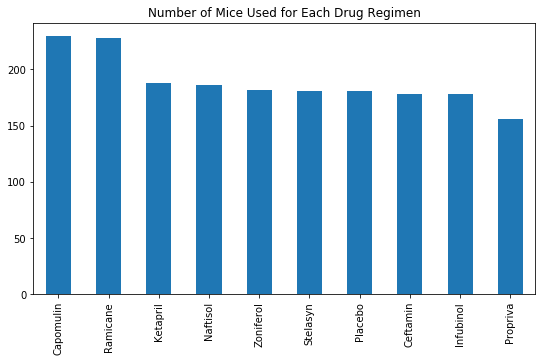

In [204]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_points = dedupe_mouse_result_df['Drug Regimen'].value_counts()

data_points.plot.bar(figsize=(9,5), use_index = True,title = 'Number of Mice Used for Each Drug Regimen')
plt.show()

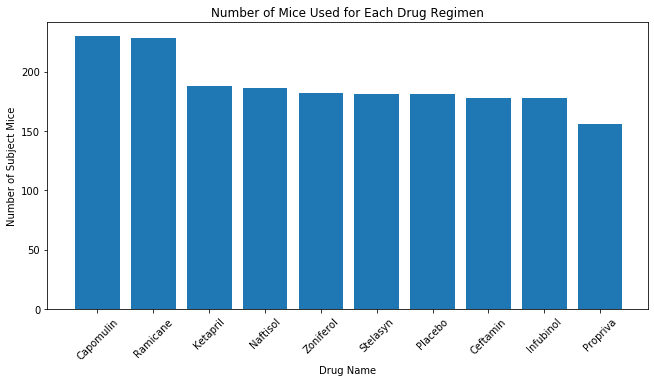

In [205]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = data_points.reset_index() 
data_points = data_points.rename(columns = {'index':'Drug Regimen','Drug Regimen':'Mice'})

plt.figure(figsize=(9,5))

x = data_points['Drug Regimen']
y = data_points['Mice']

plt.bar(x, y)
plt.xticks(rotation='45')
plt.xlim(-0.90, len(x_axis)-0.150)
plt.tight_layout()
plt.title('Number of Mice Used for Each Drug Regimen')
plt.xlabel('Drug Name')
plt.ylabel('Number of Subject Mice')
plt.show()

## Pie Plots

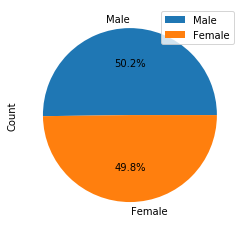

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df = mouse_metadata['Sex'].value_counts().reset_index()
mouse_df = mouse_df.rename(columns={'index':'Gender','Sex':'Count'}).set_index(['Gender'])
mouse_df.plot.pie(y='Count',autopct="%1.1f%%")
plt.show()

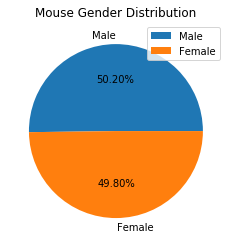

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
size = [125,124]
plt.pie(size, labels=gender,autopct="%1.2f%%", startangle=0)
plt.title('Mouse Gender Distribution')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

promising_treat = (dedupe_mouse_result_df['Drug Regimen']== 'Ramicane')|(dedupe_mouse_result_df['Drug Regimen']== 'Capomulin')|\
                  (dedupe_mouse_result_df['Drug Regimen']== 'Ceftamin')|(dedupe_mouse_result_df['Drug Regimen']== 'Infubinol')
promising_treatment_df = dedupe_mouse_result_df[promising_treat][['Drug Regimen', 'Mouse ID','Timepoint','Tumor Volume (mm3)']]
# treat_final_vol_df = promising_treatment_df.groupby(['Drug Regimen','Mouse ID']).nth(-1).reset_index()
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.nth.html
treat_final_vol_df = promising_treatment_df.groupby(['Drug Regimen','Mouse ID']).tail(1).reset_index()

ramicane_srs = treat_final_vol_df[treat_final_vol_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
capomulin_srs = treat_final_vol_df[treat_final_vol_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ceftamin_srs = treat_final_vol_df[treat_final_vol_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
infubinol_srs = treat_final_vol_df[treat_final_vol_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']

ram_1st_q = ramicane_srs.quantile(q = .1)
ram_2st_q = ramicane_srs.quantile(q = .25)
ram_3st_q = ramicane_srs.quantile(q = .5)
ram_4st_q = ramicane_srs.quantile(q = .75)

cap_1st_q = capomulin_srs.quantile(q = .1)
cap_2st_q = capomulin_srs.quantile(q = .25)
cap_3st_q = capomulin_srs.quantile(q = .5)
cap_4st_q = capomulin_srs.quantile(q = .75)

cef_1st_q = ceftamin_srs.quantile(q = .1)
cef_2st_q = ceftamin_srs.quantile(q = .25)
cef_3st_q = ceftamin_srs.quantile(q = .5)
cef_4st_q = ceftamin_srs.quantile(q = .75)

inf_1st_q = infubinol_srs.quantile(q = .1)
inf_2st_q = infubinol_srs.quantile(q = .25)
inf_3st_q = infubinol_srs.quantile(q = .5)
inf_4st_q = infubinol_srs.quantile(q = .75)

print(f'Ramicane quartiles are: Q1 = {ram_1st_q}, Q2 = {ram_2st_q}, Q3 = {ram_3st_q}, Q4 = {ram_4st_q}\n\
Ramicane IQR = {ram_3st_q-ram_1st_q}')
print(f'\nCapomulin quartiles are: Q1 = {cap_1st_q}, Q2 = {cap_2st_q}, Q3 = {cap_3st_q}, Q4 = {cap_4st_q}\n\
Capomulin IQR = {cap_3st_q-cap_1st_q}')
print(f'\nCeftamin quartiles are: Q1 = {cef_1st_q}, Q2 = {cef_2st_q}, Q3 = {cef_3st_q}, Q4 = {cef_4st_q}\n\
Ceftamin IQR = {cef_3st_q-cef_1st_q}')
print(f'\nInfubinol quartiles are: Q1 = {inf_1st_q}, Q2 = {inf_2st_q}, Q3 = {inf_3st_q}, Q4 = {inf_4st_q}\n\
Infubinol IQR = {inf_3st_q-inf_1st_q}')



Ramicane quartiles are: Q1 = 30.391589086, Q2 = 31.56046955, Q3 = 36.56165229, Q4 = 40.65900627
Ramicane IQR = 6.170063203999998

Capomulin quartiles are: Q1 = 29.284813622, Q2 = 32.37735684, Q3 = 38.125164399999996, Q4 = 40.1592203
Capomulin IQR = 8.840350777999994

Ceftamin quartiles are: Q1 = 45.0, Q2 = 48.72207785, Q3 = 59.85195552, Q4 = 64.29983003
Ceftamin IQR = 14.851955519999997

Infubinol quartiles are: Q1 = 46.554212876, Q2 = 54.04860769, Q3 = 60.16518046, Q4 = 65.52574285
Infubinol IQR = 13.610967584


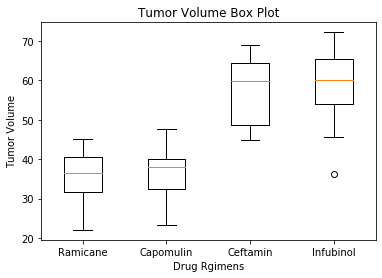

In [209]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot([ramicane_df,capomulin_srs,ceftamin_srs,infubinol_srs])
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Ceftamin','Infubinol'])
plt.title('Tumor Volume Box Plot')
plt.xlabel('Drug Rgimens')
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

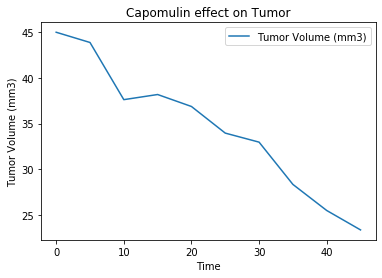

In [210]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = (dedupe_mouse_result_df['Drug Regimen'] == 'Capomulin') & ( dedupe_mouse_result_df['Mouse ID']== 's185') 
capomulin_s185_df = dedupe_mouse_result_df[mouse]
line_plt_data = capomulin_s185_df[['Timepoint','Tumor Volume (mm3)']].set_index(['Timepoint'])
line_plt_data.plot()
plt.title('Capomulin effect on Tumor')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

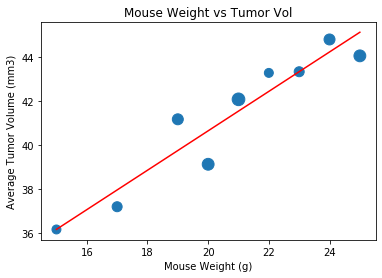

In [211]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug = dedupe_mouse_result_df['Drug Regimen'] == 'Capomulin'
data = dedupe_mouse_result_df[drug]
scatter_data = data[['Weight (g)','Tumor Volume (mm3)']]
scatter_data_df = scatter_data.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
x_val = scatter_data_df['Weight (g)']
y_val = scatter_data_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, s = [80,100,120,140,160])
plt.plot(x_val,regress_values,"r-")

plt.title('Mouse Weight vs Tumor Vol')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [212]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
   
weight = scatter_data_df['Weight (g)']
vol = scatter_data_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95
